# Loading the libraries

First we will load some basic libraries for our purposes

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Loading the dataset from the system

In [3]:
df=pd.read_csv('C:\\Users\\Shashwat Saket\\Downloads\\Fraud.csv')

# Performing EDA

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [8]:
df.shape

(6362620, 11)

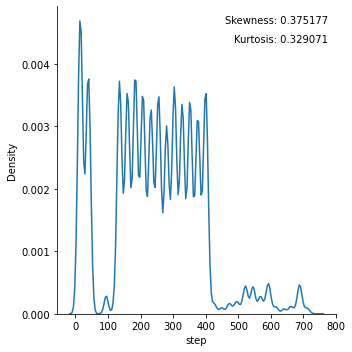

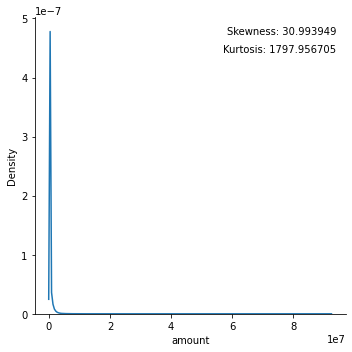

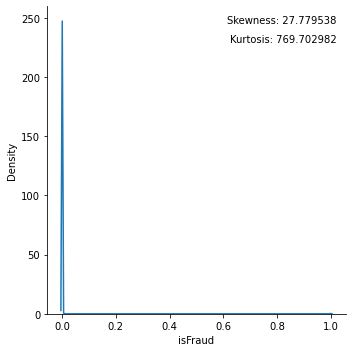

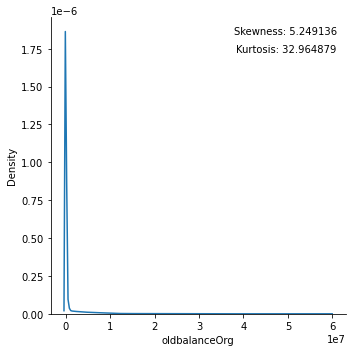

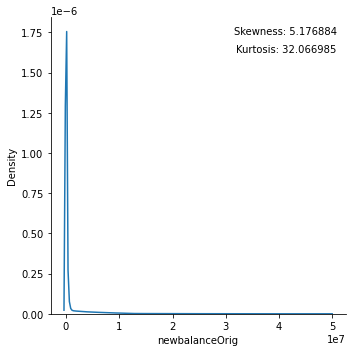

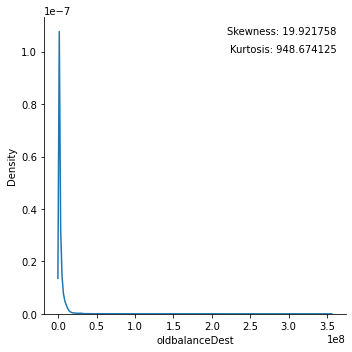

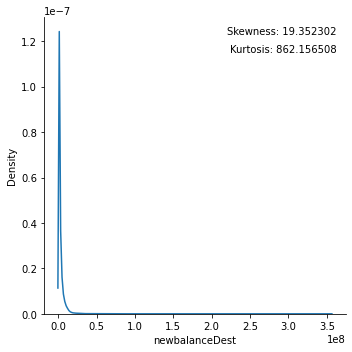

In [9]:
graph=['step','amount','isFraud', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']
for i in graph:
    g = sns.displot(data=df, x=df[i],kind ='kde')
    for ax in g.axes.ravel():
            ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df[i].skew(),\
                fontsize=10, verticalalignment='top', horizontalalignment='right')
            ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df[i].kurt(),\
                fontsize=10, verticalalignment='top', horizontalalignment='right')
    
    

 ## Analysing the skewness and kurtosis

### This demonstrates a very high skewness and kurtosis so we can remove it using log transform later

In [39]:
label= "isFraud"
X = df.drop(label, axis='columns')
y = df[label].to_numpy()

In [11]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,0


In [12]:
col=['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
col2=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)

In [14]:
X_new=X_train[col2]

In [15]:
X_new=StandardScaler().fit_transform(X_new)

In [16]:
drop_X_train = X.select_dtypes(exclude=['object'])

In [17]:
drop_X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,181.00,181.00,0.00,0.00,0.00,0
3,1,181.00,181.00,0.00,21182.00,0.00,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,0


In [18]:
X['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [19]:
object_cols = [col for col in df.columns if df[col].dtype == "object"]

In [20]:
object_cols

['type', 'nameOrig', 'nameDest']

In [21]:
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_test[col])]

In [22]:
label_encoder=LabelEncoder()
X_train['type']=label_encoder.fit_transform(X_train['type'])
X_test['type']=label_encoder.fit_transform(X_test['type'])

C:\Users\SHASHW~1\AppData\Local\Temp/ipykernel_7108/341610649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['type']=label_encoder.fit_transform(X_train['type'])
C:\Users\SHASHW~1\AppData\Local\Temp/ipykernel_7108/341610649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['type']=label_encoder.fit_transform(X_test['type'])


In [23]:
catcol=X_train['type']

In [24]:
X_train_new=X_train[col]
X_test_new=X_test[col]

In [25]:
catcol.shape

(4771965,)

In [26]:
X_train_new

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1521042,0,326041.32,14703825.95,15029867.26,493495.76,167454.45
1074638,1,16093.87,0.00,0.00,447802.91,463896.78
3455349,1,49301.07,0.00,0.00,5356546.69,5405847.76
1414451,1,15723.78,206059.87,190336.10,212319.65,228043.43
6267792,1,321965.50,0.00,0.00,1792304.98,2114270.49
...,...,...,...,...,...,...
2509086,1,97171.64,0.00,0.00,876514.52,973686.17
4886085,1,143375.09,0.00,0.00,256633.47,400008.56
2716271,3,1012.03,21368.00,20355.97,0.00,0.00
5543719,3,9944.82,12212.00,2267.18,0.00,0.00


In [27]:
X_test_new

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
5113549,0,284896.37,5550390.96,5835287.32,1335474.91,1050578.55
5407182,1,9618.72,2490.95,0.00,763957.30,773576.03
5970691,1,22480.43,0.00,0.00,137403.79,159884.22
6131344,0,56403.97,269445.00,325848.97,2928694.84,2872290.88
1081641,0,137060.58,75503.00,212563.58,8367211.43,8462201.26
...,...,...,...,...,...,...
3776993,0,123196.81,10201.00,133397.81,165125.48,41928.67
6181371,1,374616.37,504259.00,129642.63,634150.38,1008766.76
231565,1,182791.04,25959.00,0.00,0.00,182791.04
80435,4,1236993.88,0.00,0.00,1330123.54,2321500.51


In [28]:
for i in X_train_new:
    X_train_new[i]=np.log(X_train_new[i]+1)



C:\Users\SHASHW~1\AppData\Local\Temp/ipykernel_7108/3228474689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new[i]=np.log(X_train_new[i]+1)


In [29]:
for i in X_test_new:
    X_test_new[i]=np.log(X_test_new[i]+1)

C:\Users\SHASHW~1\AppData\Local\Temp/ipykernel_7108/2854076662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_new[i]=np.log(X_test_new[i]+1)


In [30]:
X_train_new.skew()

type             -0.294838
amount           -0.553923
oldbalanceOrg    -0.260134
newbalanceOrig    0.439752
oldbalanceDest   -0.212621
newbalanceDest   -0.386209
dtype: float64

In [31]:
X_Train=StandardScaler().fit_transform(X_train_new)
X_Test=StandardScaler().fit_transform(X_test_new)

In [40]:
# Model training on some basic Classifiers

In [32]:
model=LogisticRegression()
model.fit(X_Train,y_train)

LogisticRegression()

In [33]:
model.predict(X_Test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
model.score(X_Train,y_train)

0.9993084609799108

In [35]:
model.score(X_Test,y_test)

0.9993040602770557

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [37]:
svc=SVC()
svc.fit(X_Train,y_train)

SVC()

In [38]:
# svr = SVC()
# svr_CV = GridSearchCV(svr, param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#                                        'tol': [1e-4]}, 
#                       cv=None, verbose=False)
# svr_CV.fit(X_Train, y_train)
# print(svr_CV.best_params_)
# acc_metrics_calc(1,svr_CV,X_Train,X_Test,y_train,y_test)
# (Would have gone with grid search for searching the best parameters.)

In [44]:
from sklearn import metrics
preds = svc.predict(X_Train)
targs = y_train 
print("accuracy: ", metrics.accuracy_score(targs, preds))
print("precision: ", metrics.precision_score(targs, preds)) 
print("recall: ", metrics.recall_score(targs, preds))
print("f1: ", metrics.f1_score(targs, preds))
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))
train_preds = preds

accuracy:  0.9995852861452252
precision:  0.994792899408284
recall:  0.6823051948051948
f1:  0.8094366875300916
area under curve (auc):  0.8411502892930546
